# Exploratory Data Analysis: Delivery Time & Review Score 
This jupyter notebook is deisgned to do a bivariate analysis on delivery time. Review score is usually a good gauge of customer satisfaction. Hence, it is essential to see how the delivery time can affect the review score. 

Previously, in part 1 analysis on the different available CSVs were done. Based on that analysis, the narrowing down of values, rows, columns etc. 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")

In [3]:
# Only those with delivered ordered status would have delivery time 
olist_orders_dataset = olist_orders_dataset.loc[(olist_orders_dataset["order_status"]=="delivered")]
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# Delivery time 
From the `olist_orders_dataset`, the estimated wait time and actual wait time can be calculated. 

> The actual wait time is calculated as: **ordered_delivered_customer_date** - **order_purchase_timestemp**

Firstly, the values have to be converted into a datetime64 format. 

> The estimated wait time is calculated as: **ordered_estimated_delivery_date** - **order_purchase_timestemp**

Again, the values have to be converted into a datetime64 format. 

In [4]:
# Creating a list of the time related variables 
time = ["order_purchase_timestamp","order_estimated_delivery_date","order_delivered_customer_date", "order_approved_at"]
# Changing the time related variables to datetime format using the list 
for column in time:
    olist_orders_dataset.loc[:, column] = pd.to_datetime(olist_orders_dataset[column])

In [5]:
# Calculating the actual wait time    
olist_orders_dataset.loc[:,"actual_wait_time"] = (olist_orders_dataset['order_delivered_customer_date']-olist_orders_dataset['order_purchase_timestamp']).dt.days

In [6]:
# Calculating the estimated wait time 
olist_orders_dataset.loc[:,"estimated_wait_time"] = (olist_orders_dataset['order_estimated_delivery_date']-olist_orders_dataset['order_purchase_timestamp']).dt.days

In [7]:
#Calculating the payment wait time which is the time at which the order was approved minus the time at which the purchase was made
olist_orders_dataset.loc[:,"payment_wait_time"] = (olist_orders_dataset['order_approved_at']-olist_orders_dataset['order_purchase_timestamp']).dt.days

In [8]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_wait_time,estimated_wait_time,payment_wait_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,15,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,19,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,26,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,12,0.0


In [9]:
#Actual minus estimated wait time 
olist_orders_dataset.loc[:,"actualxestimated"] = (olist_orders_dataset['actual_wait_time']-olist_orders_dataset['estimated_wait_time'])


### Payment and actual vs Payment and estimated  
The reason why such a formula was created was because orders are not usually approved until payment. Orders are not packed, made or shipped before payment by the customer. Hence it is important to know the difference between payment and actual time vs payment and estimated time. This is similar to the difference between actual and estimated times except that it includes the payment time as well. 

In [10]:
#Time from difference between payment and actual vs payment and estimated time 
olist_orders_dataset.loc[:,"payment_actual_estimated"] = (olist_orders_dataset['actual_wait_time']-olist_orders_dataset['payment_wait_time']-olist_orders_dataset['estimated_wait_time'])

# Plotting the graphs 
The plotting of the graphs was done using the Seaborn module. A histogram with a kernel density estimation graph(KDE). The binwidth is an important factor while plotting the graph. The binwidth of 1 ensures that it counts in steps of 1. Using both the histogram and KDE, it is possible to estimate the mode of the variable. Using the pandas describe function, the mean, standard deviation, the distribution can be extracted. 

In [11]:
olist_orders_dataset.describe()

,actual_wait_time,estimated_wait_time,payment_wait_time,actualxestimated,payment_actual_estimated
count,96470.000000,96478.000000,96464.000000,96470.000000,96456.000000
mean,12.093604,23.372759,0.264337,-11.279144,-11.541967
std,9.551380,8.758137,0.729926,10.192137,10.195838
min,0.000000,2.000000,0.000000,-146.000000,-146.000000
25%,6.000000,18.000000,0.000000,-16.000000,-17.000000
50%,10.000000,23.000000,0.000000,-12.000000,-12.000000
75%,15.000000,28.000000,0.000000,-7.000000,-7.000000
max,209.000000,155.000000,30.000000,189.000000,189.000000


<Figure size 1440x1440 with 0 Axes>

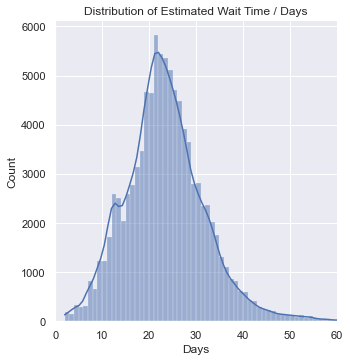

In [12]:
plt.figure(figsize = (20, 20))

sb.displot(olist_orders_dataset, x="estimated_wait_time", binwidth=1, kde = True)

plt.title("Distribution of Estimated Wait Time / Days")
plt.xlabel("Days")
plt.ylabel("Count")
plt.xlim((0, 60))

plt.show()

The above histogram shows the distribution of estimated wait time. The distribution does not follow a perfect Gaussian distrbution. 

However, using the graph it can be seen that the most frequent estimated wait time is 21. 

<Figure size 1440x1440 with 0 Axes>

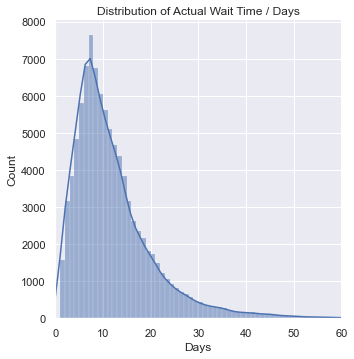

In [13]:
plt.figure(figsize = (20, 20))

sb.displot(olist_orders_dataset, x="actual_wait_time", binwidth=1, kde = True)

plt.title("Distribution of Actual Wait Time / Days")
plt.xlabel("Days")
plt.ylabel("Count")
plt.xlim((0, 60))

plt.show()

The above histogram shows the distribution of actual wait time. The distribution does not follow a perfect Gaussian distrbution. 

However, using the graph it can be seen that the most frequent actual wait time is 8 days. This shows that the actual wait time is significantly lower than the estimated wait time. This observation is substantiated with the table produced from the describe function in the pandas module. The mean actual time is 12.093604 days and the mean estimated wait time is 23.372759 days. 

<Figure size 3600x3600 with 0 Axes>

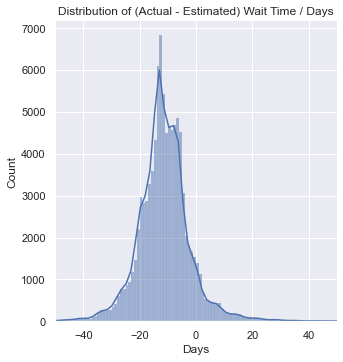

In [14]:
plt.figure(figsize = (50, 50))

sb.displot(olist_orders_dataset, x="actualxestimated", binwidth=1, kde = True)

plt.title("Distribution of (Actual - Estimated) Wait Time / Days")
plt.xlabel("Days")
plt.ylabel("Count")
plt.xlim((-50, 50))

plt.show()

The above histogram shows the distribution of (actual-estimated) wait time. The distribution does not follow a perfect Gaussian distrbution. 

However, using the graph it can be seen that the most frequent (actual-estimated) time is -11 days. This matches the mean actual minus mean estimated (23-12 = 11). It shows that orders are frequently met much earlier than expected and can contribute to higher review scores.

# Further cleaning before further analysis 
From part 1, it was realized that there are duplicated data. Hence, it is important to remove them. 

In [15]:
olist_Merge = olist_orders_dataset.merge(olist_order_reviews_dataset, on="order_id", how = 'left')

In [16]:
olist_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97015 entries, 0 to 97014
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97015 non-null  object        
 1   customer_id                    97015 non-null  object        
 2   order_status                   97015 non-null  object        
 3   order_purchase_timestamp       97015 non-null  datetime64[ns]
 4   order_approved_at              97001 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97013 non-null  object        
 6   order_delivered_customer_date  97007 non-null  datetime64[ns]
 7   order_estimated_delivery_date  97015 non-null  datetime64[ns]
 8   actual_wait_time               97007 non-null  float64       
 9   estimated_wait_time            97015 non-null  int64         
 10  payment_wait_time              97001 non-null  float64       
 11  actualxestimate

In [17]:
duplicate_last = olist_Merge[olist_Merge.duplicated(subset="order_id", keep='last')] 
duplicate_first = olist_Merge[olist_Merge.duplicated(subset="order_id", keep='first')] 

In [18]:
duplicate_last.describe()

,actual_wait_time,estimated_wait_time,payment_wait_time,actualxestimated,payment_actual_estimated,review_score
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,13.256983,25.318436,0.299814,-12.061453,-12.361266,4.078212
std,8.763533,8.762682,0.678467,10.272497,10.351825,1.344360
min,1.000000,4.000000,0.000000,-77.000000,-80.000000,1.000000
25%,7.000000,20.000000,0.000000,-17.000000,-18.000000,4.000000
50%,12.000000,24.000000,0.000000,-12.000000,-12.000000,5.000000
75%,17.000000,30.000000,0.000000,-7.000000,-8.000000,5.000000
max,67.000000,89.000000,5.000000,41.000000,40.000000,5.000000


In [19]:
duplicate_first.describe()

,actual_wait_time,estimated_wait_time,payment_wait_time,actualxestimated,payment_actual_estimated,review_score
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,13.256983,25.318436,0.299814,-12.061453,-12.361266,4.042831
std,8.763533,8.762682,0.678467,10.272497,10.351825,1.361802
min,1.000000,4.000000,0.000000,-77.000000,-80.000000,1.000000
25%,7.000000,20.000000,0.000000,-17.000000,-18.000000,3.000000
50%,12.000000,24.000000,0.000000,-12.000000,-12.000000,5.000000
75%,17.000000,30.000000,0.000000,-7.000000,-8.000000,5.000000
max,67.000000,89.000000,5.000000,41.000000,40.000000,5.000000


In [20]:
olist_Merge.drop_duplicates(subset=["review_score", "order_id"], inplace = True)

In [21]:
olist_Merge = pd.DataFrame(olist_Merge[['order_id','customer_id','review_score','actual_wait_time','estimated_wait_time', 'actualxestimated', 'payment_wait_time', 'payment_actual_estimated']])

In [22]:
olist_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96674 entries, 0 to 97014
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  96674 non-null  object 
 1   customer_id               96674 non-null  object 
 2   review_score              96674 non-null  int64  
 3   actual_wait_time          96666 non-null  float64
 4   estimated_wait_time       96674 non-null  int64  
 5   actualxestimated          96666 non-null  float64
 6   payment_wait_time         96660 non-null  float64
 7   payment_actual_estimated  96652 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


# Bivariate analysis on how the various time variables affect the review score

<AxesSubplot:xlabel='review_score', ylabel='actualxestimated'>

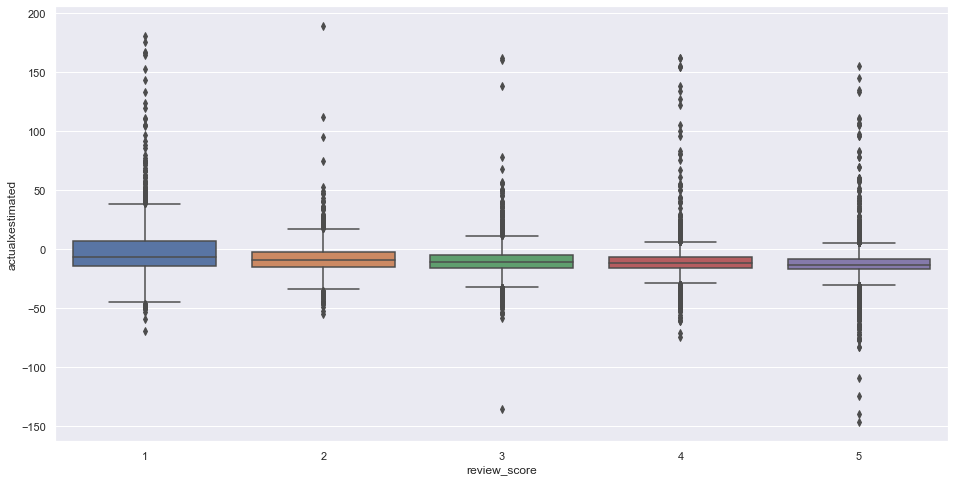

In [23]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'actualxestimated', data = olist_Merge)

<AxesSubplot:xlabel='review_score', ylabel='estimated_wait_time'>

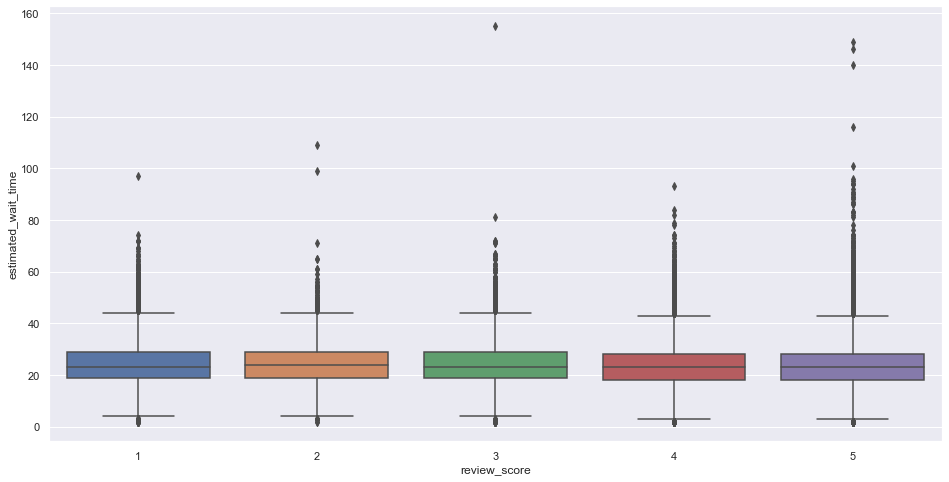

In [24]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'estimated_wait_time', data = olist_Merge)

<AxesSubplot:xlabel='review_score', ylabel='actual_wait_time'>

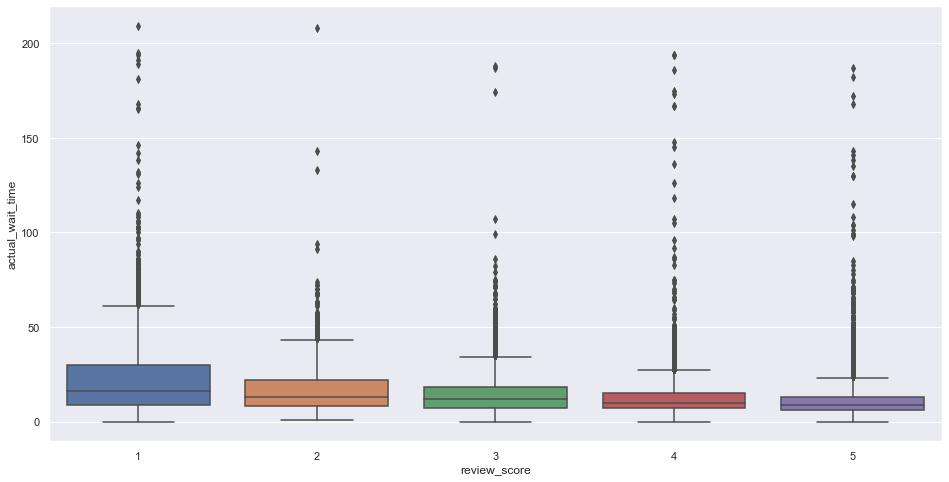

In [25]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'actual_wait_time', data = olist_Merge)

<AxesSubplot:xlabel='review_score', ylabel='payment_wait_time'>

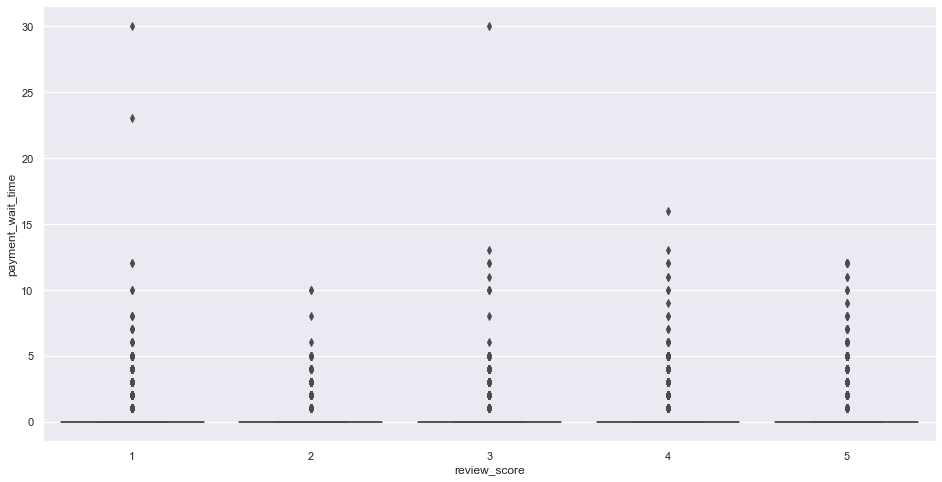

In [26]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'payment_wait_time', data = olist_Merge)

<AxesSubplot:xlabel='review_score', ylabel='payment_actual_estimated'>

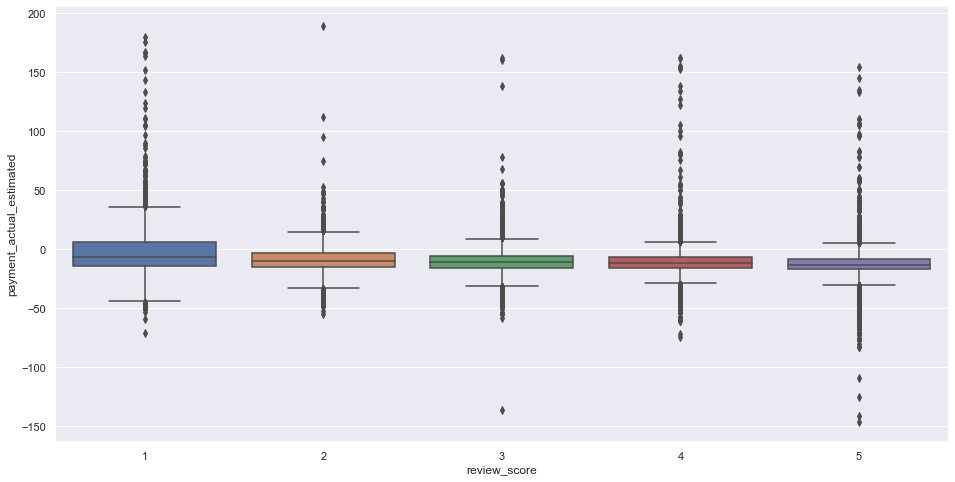

In [27]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'payment_actual_estimated', data = olist_Merge)

<AxesSubplot:>

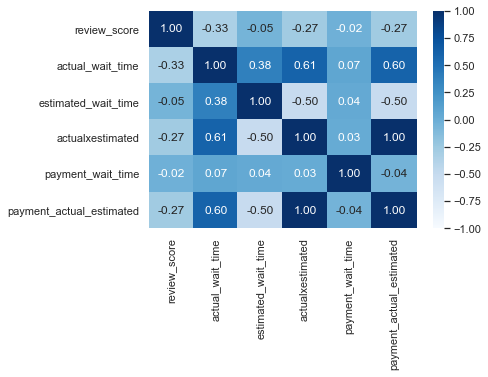

In [28]:
sb.heatmap(olist_Merge.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", cmap ="Blues")

# Checkpoint and Analysis 
From the boxplots, there is a slight correlation seen. When the actual wait time decreases, the review score increases. When the (actual-estimated) times reduces, the review score increases as well. However, when a heatmap (from the seaborn module) is used, it seems there is very weak negative correlation between review score and the time variables. 

However, one possible reason for the weak correlation is that the .corr() function uses only linear relationships. The relationships seen here could be similar to a exponential decay curve. Hence, a bar plot may help to see the relationship slightly better. This is because the time variable is continuous while the review_score is a discrete categorical data type. 

<AxesSubplot:xlabel='review_score', ylabel='estimated_wait_time'>

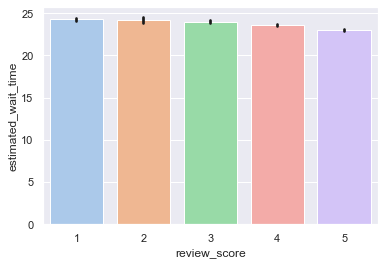

In [29]:
sb.barplot(x='review_score', y='estimated_wait_time', data=olist_Merge, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='review_score', ylabel='actual_wait_time'>

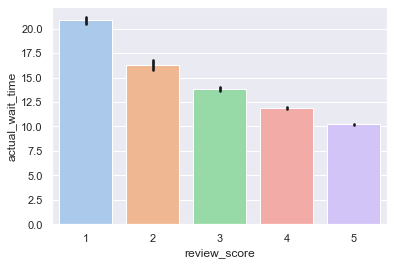

In [30]:
sb.barplot(x='review_score', y='actual_wait_time', data=olist_Merge, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='review_score', ylabel='actualxestimated'>

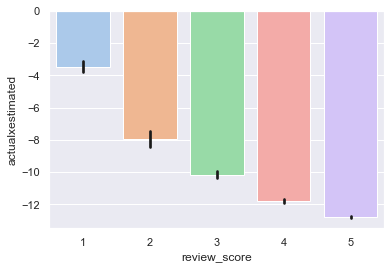

In [31]:
sb.barplot(x='review_score', y='actualxestimated', data=olist_Merge, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='review_score', ylabel='payment_wait_time'>

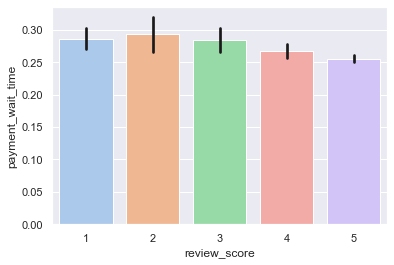

In [32]:
sb.barplot(x='review_score', y='payment_wait_time', data=olist_Merge, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='review_score', ylabel='payment_actual_estimated'>

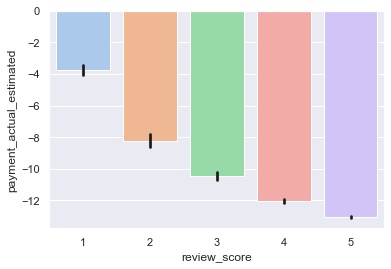

In [33]:
sb.barplot(x='review_score', y='payment_actual_estimated', data=olist_Merge, palette ="pastel" , errcolor='k')

# Check Point: Analysis 
Firstly, the payment time is very small within a range of 0 to 0.3. Hence, it would not contribute significantly to the review score. Additionally, there is no direct correlation between payment wait time and review score. 

Similarly, the estimated wait time does not have a correlation with review score. 

However, the actual wait time, and the (actual-estimated) wait time does affect the review score. There is a strong negative correlation as seen visually. It is simply not a linear correlation as seen from the heat map. From the graph, it **visually** follows the shape of an exponential decay curve. 